In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('postgresql://localhost:5432/department_db')
connection = engine.connect()

In [3]:
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


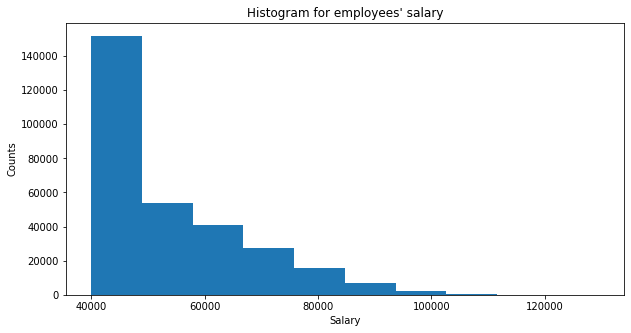

In [4]:
plt.figure(figsize=(10,5))
plt.hist(salaries_df['salary'])
plt.xlabel('Salary')
plt.ylabel('Counts')
plt.title("Histogram for employees' salary")
plt.show()

The most common salary range for employees is between 40,000 and 50,000.

In [5]:
titles_df = pd.read_sql("SELECT * FROM titles", connection)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [6]:
combined_df = salaries_df.merge(titles_df, on="emp_no", how="inner")
combined_df.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [7]:
grouped_df = combined_df.groupby("title").mean()
grouped_df

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614
Staff,253399.240672,58465.271904
Technique Leader,251708.951052,48580.505772


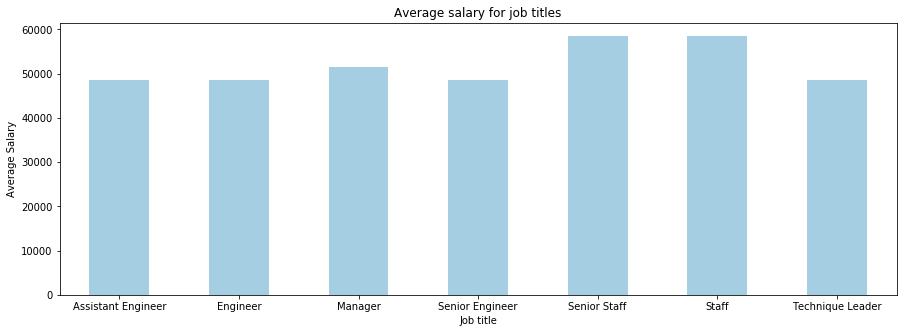

<Figure size 432x288 with 0 Axes>

In [10]:
title_plot=grouped_df['salary'].plot(kind="bar", figsize=(15,5), colormap='Paired')
title_plot.set_xticklabels(grouped_df.index, rotation=0)
plt.title("Average salary for job titles")
plt.xlabel('Job title')
plt.ylabel('Average Salary')
plt.show()
plt.tight_layout()